# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Libraries Used Explanation

For this AI project, several Python libraries have been used to handle **data processing, model development, evaluation and visualization**. Each library is briefly explained below:

#### Data Handling
- **pandas**: Used for loading, manipulating, and analyzing the dataset. It allows easy handling of tabular data, filtering rows/columns and performing calculations.
- **numpy**: Provides support for numerical operations, working with arrays and performing mathematical computations efficiently.

#### Visualization
- **matplotlib**: A foundational library for creating plots such as line plots, bar charts, and scatter plots.
- **seaborn**: A high-level visualization library built on matplotlib, used for creating statistical graphics such as heatmaps, distribution plots, and correlation plots.

#### Preprocessing and Dataset Splitting
- **train_test_split**: Splits the dataset into training and testing sets, which is essential to evaluate model performance on unseen data.
- **LabelEncoder**: Converts categorical text features (like gender, family history, or activity type) into numeric codes, which are required by most machine learning models.

#### Machine Learning Models
- **DecisionTreeClassifier**: A single decision tree model used for classification tasks, which makes predictions based on feature splits.
- **RandomForestClassifier**: An ensemble of multiple decision trees, which reduces overfitting and improves prediction accuracy.
- **XGBoost**: A gradient boosting algorithm designed for high-performance classification and regression, especially effective with structured/tabular data.

####  Model Evaluation
- **classification_report**: Provides precision, recall, F1-score and support metrics for each class to assess the model’s performance comprehensively.
- **confusion_matrix**: Displays the number of correct and incorrect predictions for each class, allowing a detailed error analysis.

> These libraries collectively provide the necessary tools for **preprocessing the data, training multiple machine learning models, visualizing results and evaluating model performance** for the obesity prediction application.
---


In [2]:
# Loading the Dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Loading the Dataset

Using pandas, the dataset is loaded into a **DataFrame**, which is a tabular data structure similar to a spreadsheet. Viewing the first few rows of the dataset helps in **understanding the structure of the data**, checking the types of features (numerical or categorical), and identifying any immediate issues that need preprocessing.  

Key points observed from the dataset:
- Contains both **numerical features** (e.g., Age, Height, Weight) and **categorical features** (e.g., Gender, Family History, Eating Habits).  
- The **target variable** is `NObeyesdad`, which represents the obesity level of the individual.
- ---

In [3]:
# Checking dataset info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Dataset Overview

The dataset contains **2111 entries** and **17 columns**.  

- **Numerical features (8 columns):** Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE  
- **Categorical/text features (9 columns):** Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad  
- The **target variable** is `NObeyesdad`, representing the obesity level.
---

In [4]:
# Dropping unnecessary column 'SMOKE' 
df = df.drop(['SMOKE'], axis=1)

#### - Dropping  column 'SMOKE' as it is not relevant for predicting obesity.
#### - This is part of data preprocessing to clean the dataset before analysis and modeling.
---

In [5]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

#### Summary Statistics
- Using `df.describe()` we get basic statistics for numerical features such as count, mean, std, min, max, and quartiles.  
- This helps to understand data distribution, detect outliers and plan further analysis.
---

In [6]:
## Checking for Missing Values
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


#### Summary 
- Using `df.isnull().sum()` we check if any column has missing values.  
- This ensures the dataset is complete and ready for preprocessing and modeling.
---

In [7]:
## Distribution of Obesity Classes
print(df['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


#### Overview

- The `df['NObeyesdad'].value_counts()` command shows how many samples belong to each obesity category.  
- This helps to understand the **class balance** of the target variable before training the models.
---

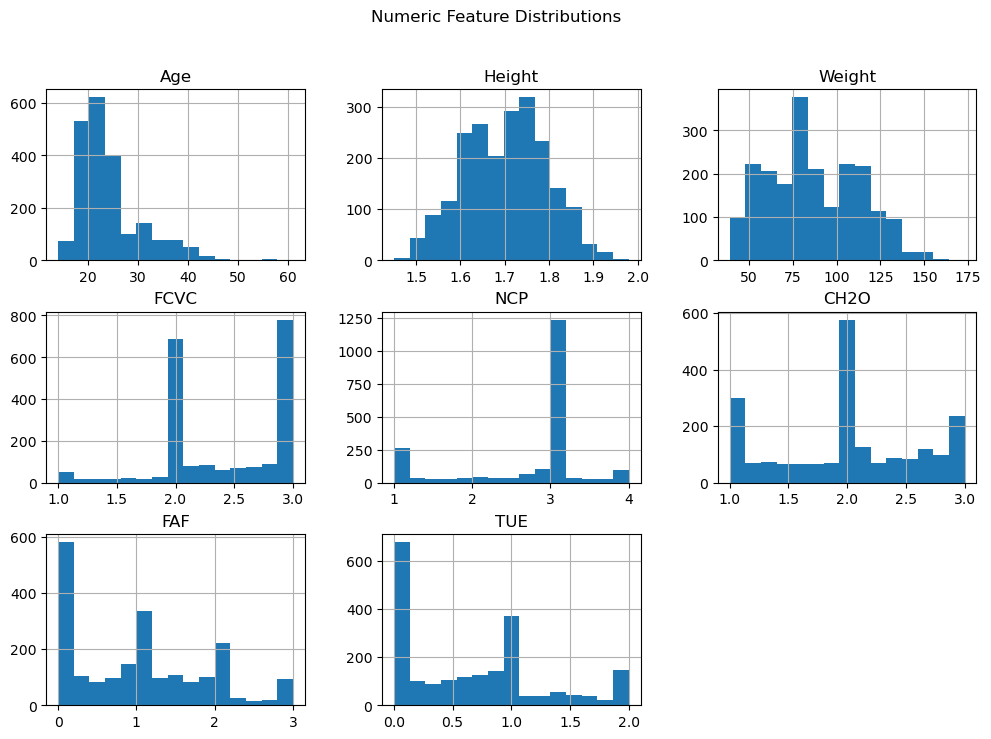

In [8]:
## Distribution of Numerical Features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12, 8), bins=15)
plt.suptitle("Numeric Feature Distributions")
plt.show()

#### Overview
- Histograms are used to visualize the distribution of numerical features in the dataset.  
- This helps to understand the range, spread and shape of each feature and identify any skewness or unusual patterns in the data.
- -----


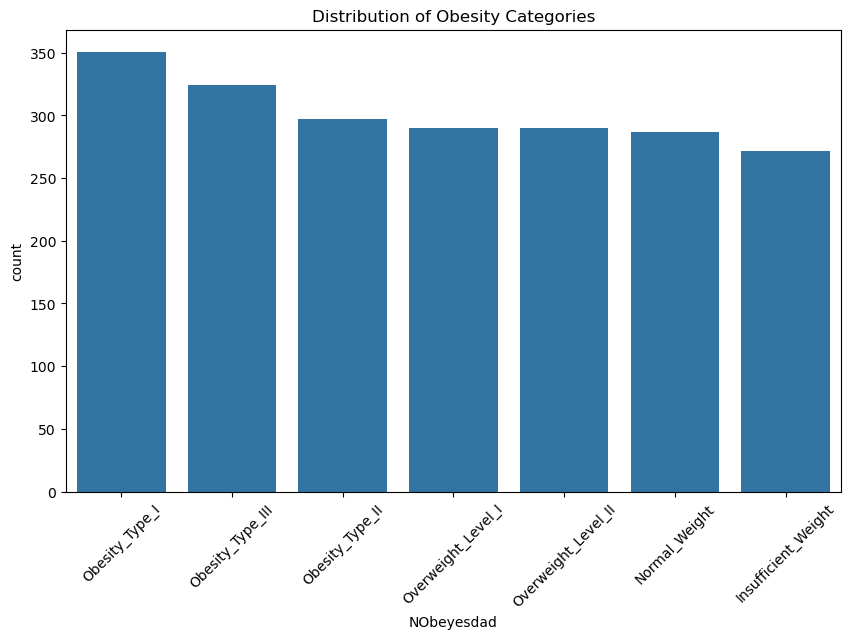

In [9]:
# Countplot for target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title("Distribution of Obesity Categories")
plt.xticks(rotation=45)
plt.show()

### Code Explanation:
- `sns.countplot()` displays the frequency of each obesity class.
- The `order` parameter arranges the bars based on class counts for better comparison.
- `plt.xticks(rotation=45)` rotates the labels to improve readability.

### Output Explanation:
- The bar chart shows the distribution of individuals across the seven obesity categories.
- The classes have **similar counts**, indicating that the dataset is **fairly balanced**.
- Since no class is severely underrepresented, **resampling techniques like SMOTE are not required**.
------

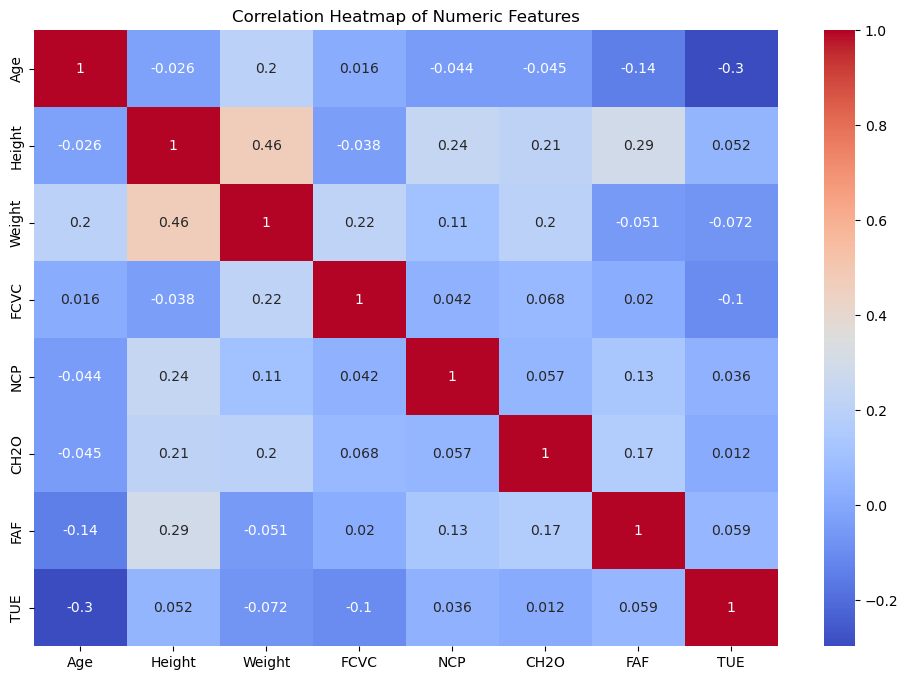

In [10]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Correlation Heatmap of Numerical Features

A correlation heatmap is used to analyze the **relationship between numerical features** in the dataset.

### Code Explanation:
- Only numerical columns are selected to avoid errors with categorical data.
- `df[numeric_cols].corr()` computes the correlation coefficients between features.
- `sns.heatmap()` visualizes these correlations using color intensity.

### Output Explanation:
- Strong positive or negative correlations indicate features that are closely related.
- For example, **Weight** shows strong correlation with obesity-related outcomes.
- Features with low correlation are less directly related to each other.
---

# Preprocessing 

In [11]:
# Identifying categorical columns (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns.drop('NObeyesdad')

# Convert categorical columns to numeric codes
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Encode target variable
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# Check encoding
print(df.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2   2.0    0  0.0  1.0     3       3           1  
1  3.0     2   3.0    1  3.0  0.0     2       3           1  
2  3.0     2   2.0    0  2.0  1.0     1       3           1  
3  3.0     2   2.0    0  2.0  0.0     1       4           5  
4  1.0     2   2.0    0  0.0  0.0     2       3           6  


### Categorical Encoding

The dataset contains several categorical features represented as text. Since machine learning models require numerical input, these categorical variables are converted into numeric form.

- All input categorical columns (excluding the target variable) are encoded using **category codes**.
- The target variable `NObeyesdad` is encoded separately using **Label Encoding** to support multi-class classification.

This encoding approach is suitable because tree-based models (Decision Tree, Random Forest, XGBoost) can handle encoded categorical values effectively.

### Output Interpretation
After encoding:
- Categorical features such as `Gender`, `FAVC`, `CAEC` and `MTRANS` are represented by numeric values.
- The target variable `NObeyesdad` is converted into integer class labels.
- Numerical features remain unchanged.

---

In [12]:
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

### Feature Target Separation

The dataset is divided into:
- **Features (X):** All input variables used to predict obesity levels.
- **Target (y):** The output variable `NObeyesdad`, which represents the obesity category.

Separating features and the target variable is necessary before splitting the data and training machine learning models.

-----

In [13]:
# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check sizes
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (1688, 15)
Test set: (423, 15)


## Train–Test Split

The dataset is split into **training** and **testing** sets to evaluate model performance on unseen data.

- **80%** of the data is used for training the models.
- **20%** of the data is reserved for testing.
- `stratify=y` ensures that all obesity classes are proportionally represented in both sets.
- `random_state=42` is used to make the split reproducible.

This step helps prevent overfitting and provides a fair assessment of model performance.

---

# Decision Tree Classifier 

In [14]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

Decision Tree - Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.85      0.91        54
      Normal_Weight       0.76      0.83      0.79        58
     Obesity_Type_I       0.93      0.90      0.91        70
    Obesity_Type_II       0.97      0.97      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.82      0.86      0.84        58
Overweight_Level_II       0.88      0.91      0.90        58

           accuracy                           0.90       423
          macro avg       0.91      0.90      0.90       423
       weighted avg       0.91      0.90      0.90       423



### Code Explanation
The Decision Tree classifier was initialized and trained on the training dataset (`X_train`, `y_train`). After training, it predicted obesity levels on the test set (`X_test`). The model's performance was then evaluated using a classification report, which includes metrics like **precision**, **recall**, **F1-score**, and **support** for each class.

### Output Interpretation
The model achieved an **overall accuracy of 90%**, indicating it correctly classified most test samples.  

- **Insufficient_Weight:** High precision (0.98) but slightly lower recall (0.85), meaning most predicted cases were correct, but a few were missed.  
- **Normal_Weight:** Moderate precision (0.76) and recall (0.83), showing decent prediction.  
- **Obesity Types I–III:** Very high F1-scores (0.91–0.99), indicating excellent prediction for obesity categories.  
- **Overweight Levels I & II:** Good performance with F1-scores around 0.84–0.90.  


### Confusion Matrix (Decision Tree)

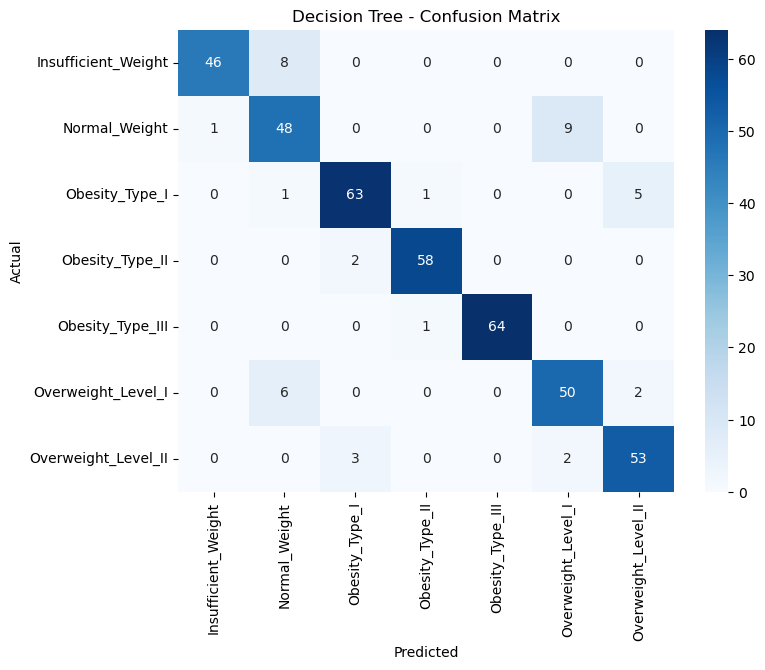

In [15]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Code Explanation
The confusion matrix shows how well the Decision Tree model predicts each obesity category.  
- `confusion_matrix(y_test, y_pred_dt)` calculates the number of correct and incorrect predictions for each class.  
- `sns.heatmap` is used to visualize the confusion matrix as a colored grid for easier interpretation.  
- The axes represent **Actual** vs **Predicted** classes.

### Output Interpretation
- The diagonal values represent **correct predictions** for each class.  
- Off-diagonal values indicate **misclassifications**, i.e., instances where the model predicted the wrong obesity category.  
- A darker color on the diagonal and lighter colors elsewhere indicate better model performance.
 -----

# Random Forest

In [16]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest - Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.82      0.97      0.89        58
     Obesity_Type_I       0.96      0.97      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.95      0.90      0.92        58
Overweight_Level_II       0.98      0.95      0.96        58

           accuracy                           0.96       423
          macro avg       0.96      0.95      0.95       423
       weighted avg       0.96      0.96      0.96       423



### Code Explanation
The **Random Forest classifier** was initialized with 100 trees (`n_estimators=100`) and trained on the training dataset (`X_train`, `y_train`).  
After training, it predicted obesity levels on the test set (`X_test`) and its performance was evaluated using a classification report, showing **precision**, **recall**, **F1-score** and **support** for each class.

### Output Interpretation
The Random Forest model achieved an **overall accuracy of 96%**, outperforming the Decision Tree.  

- **Insufficient_Weight:** Perfect precision (1.00) and high recall (0.93), meaning almost all predicted cases were correct.  
- **Normal_Weight:** High recall (0.97) with good precision (0.82), indicating most actual normal weight cases were correctly predicted.  
- **Obesity Types I–III:** Excellent performance with F1-scores ranging 0.96–0.99.  
- **Overweight Levels I & II:** Strong prediction with F1-scores 0.92–0.96.  

## Confusion Matrix (Random Forest)

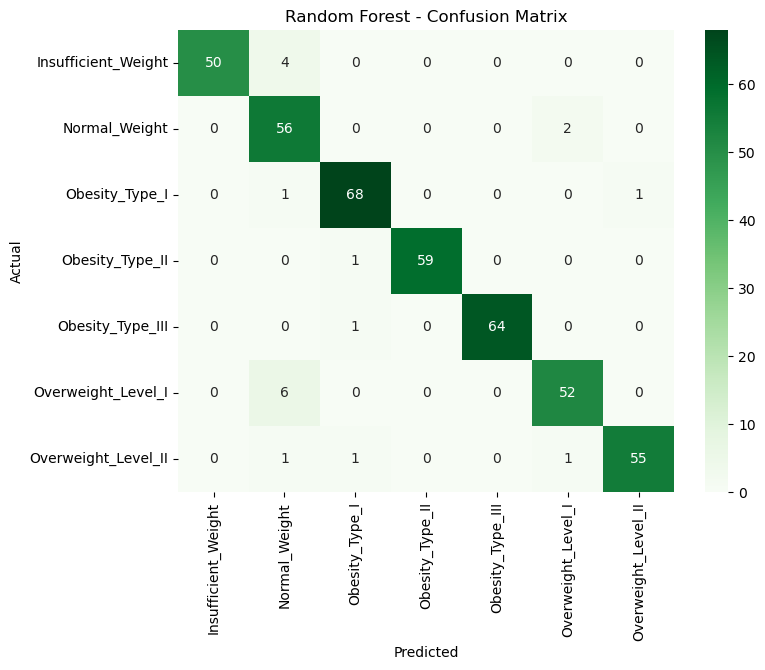

In [17]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Explanation
The confusion matrix visualizes how well the Random Forest model predicts each obesity category.  
- Each cell shows the number of predictions for a given **Actual vs Predicted** class.  
- The diagonal cells represent **correct predictions**, while off-diagonal cells indicate **misclassifications**.  
- The green color scale (`cmap='Greens'`) makes it easy to see where the model performs well.  

### Interpretation
- Most predictions fall on the diagonal, showing the model **correctly classifies most samples**.  
- Few off-diagonal values indicate **minor misclassifications**, demonstrating that the Random Forest achieves **high accuracy (96%)**.  
- This matrix confirms the model is highly reliable for predicting all obesity levels, performing even better than the Decision Tree.

-----

# XGBoost Classifier

In [18]:
# Initialize XGBoost for multi-class
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=len(le.classes_), 
    eval_metric='mlogloss', 
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

XGBoost - Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.93      0.94        54
      Normal_Weight       0.85      0.95      0.89        58
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.90      0.93        58
Overweight_Level_II       0.97      0.97      0.97        58

           accuracy                           0.96       423
          macro avg       0.96      0.95      0.95       423
       weighted avg       0.96      0.96      0.96       423



### Code Explanation
The **XGBoost classifier** was initialized for multi-class classification (`objective='multi:softmax'`) with the number of classes equal to the obesity categories.  
The model was trained on the training set (`X_train`, `y_train`) and used to predict obesity levels on the test set (`X_test`).  
Performance was evaluated using a classification report, which includes **precision**, **recall**, **F1-score** and **support** for each class.

### Output Interpretation
The XGBoost model achieved an **overall accuracy of 96%**, comparable to the Random Forest.  

- **Insufficient_Weight:** High precision (0.96) and recall (0.93), showing reliable predictions.  
- **Normal_Weight:** Precision 0.85 and recall 0.95, indicating most actual normal cases were correctly predicted.  
- **Obesity Types I–III:** Excellent performance with F1-scores 0.97–0.99, demonstrating strong predictive ability.  
- **Overweight Levels I & II:** Strong F1-scores (0.93–0.97), indicating accurate classification.  

## Confusion Matrix(XGBoost)

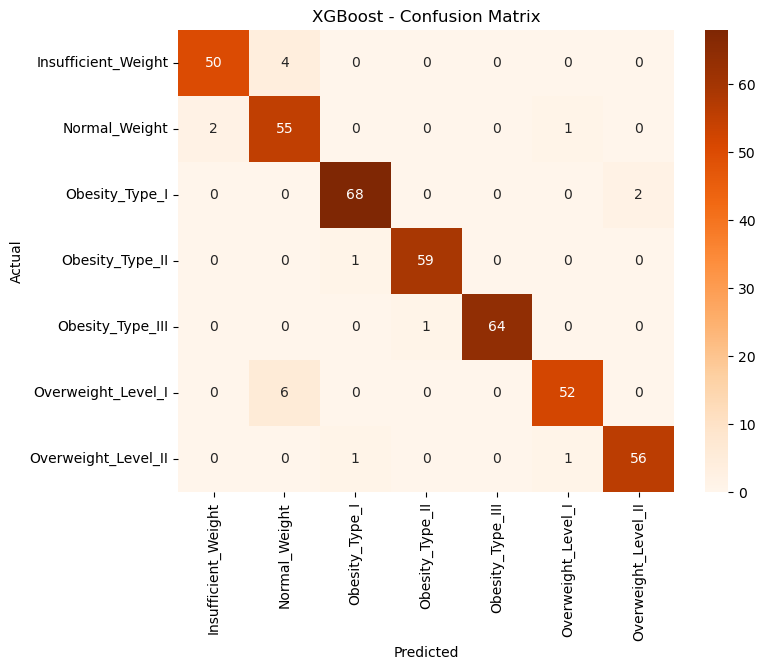

In [19]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Explanation
The confusion matrix visualizes the performance of the XGBoost model for each obesity category.  
- Each cell shows the number of predictions for a given **Actual vs Predicted** class.  
- The diagonal represents **correct predictions**, while off-diagonal cells indicate **misclassifications**.  
- The orange color scale (`cmap='Oranges'`) highlights correct predictions prominently.

### Interpretation
- Most values are concentrated on the diagonal, indicating the model **correctly classifies the majority of test samples**.  
- Few off-diagonal cells show minor misclassifications, confirming the **high accuracy of 96%**.  
- This demonstrates that XGBoost reliably predicts obesity levels across all classes, similar to Random Forest, with consistent and balanced performance.

----

# Comparison of Models

=== Model Comparison Table ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.90,0.91,0.90,0.90
1,Random Forest,0.96,0.96,0.96,0.96
2,XGBoost,0.96,0.96,0.96,0.96


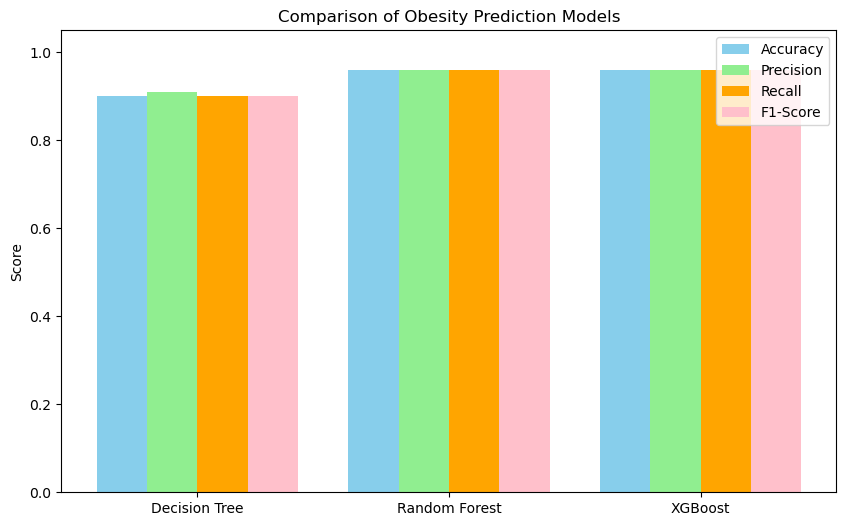

In [20]:
# Get classification reports as dictionaries 
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)

# Create a comparison dataframe (weighted averages + accuracy) 
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [dt_report['accuracy'], rf_report['accuracy'], xgb_report['accuracy']],
    'Precision': [dt_report['weighted avg']['precision'], rf_report['weighted avg']['precision'], xgb_report['weighted avg']['precision']],
    'Recall': [dt_report['weighted avg']['recall'], rf_report['weighted avg']['recall'], xgb_report['weighted avg']['recall']],
    'F1-Score': [dt_report['weighted avg']['f1-score'], rf_report['weighted avg']['f1-score'], xgb_report['weighted avg']['f1-score']]
})

# Round metrics to 2 decimals
comparison_df = comparison_df.round(2)

# Display the table
print("=== Model Comparison Table ===")
display(comparison_df)

# Create a bar chart for visual comparison 
models = comparison_df['Model']
accuracy = comparison_df['Accuracy']
precision = comparison_df['Precision']
recall = comparison_df['Recall']
f1 = comparison_df['F1-Score']

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='orange')
plt.bar(x + 1.5*width, f1, width, label='F1-Score', color='pink')

plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Comparison of Obesity Prediction Models')
plt.legend()
plt.show()

###  Key Observations

- **Decision Tree:**  
  - Accuracy around **90%**.  
  - Performs reasonably well but shows more misclassifications.  
  - Less reliable for predicting all obesity categories compared to ensemble models.

- **Random Forest:**  
  - Accuracy around **96%**.  
  - Strong and consistent performance across all metrics.  
  - Handles complex patterns better due to the ensemble of trees.

- **XGBoost:**  
  - Accuracy around **96%**, similar to Random Forest.  
  - Balanced predictions with high precision, recall and F1-score.  
  - Handles multi-class classification reliably and consistently.

## Conclusion

- **Random Forest and XGBoost outperform Decision Tree** in all key metrics.  
- Both ensemble models are suitable for deployment, providing **high accuracy and robustness**.  
- Decision Tree can be used for simpler tasks or initial experimentation, but is less reliable for multi-class obesity prediction.

---

# Hyperparameter tuning 

### 1. Decision Tree

In [21]:
# 1. Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Define the hyperparameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# 3. Set up GridSearchCV
grid_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,                # 5-fold cross-validation
    n_jobs=-1            # Use all CPUs
)

# 4. Fit the grid search
grid_dt.fit(X_train, y_train)

# 5. Best parameters and best score
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best CV Accuracy:", grid_dt.best_score_)

# 6. Use best estimator to predict
best_dt = grid_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

from sklearn.metrics import classification_report
print("Decision Tree - Classification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_best_dt, target_names=le.classes_))

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.9449072041859077
Decision Tree - Classification Report after Hyperparameter Tuning:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.94      0.96        54
      Normal_Weight       0.88      0.84      0.86        58
     Obesity_Type_I       0.87      0.97      0.92        70
    Obesity_Type_II       0.98      0.92      0.95        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.84      0.90      0.87        58
Overweight_Level_II       0.95      0.90      0.92        58

           accuracy                           0.92       423
          macro avg       0.93      0.92      0.92       423
       weighted avg       0.93      0.92      0.92       423



### Output Explanation

**Best Parameters:**  
- `criterion`: entropy  
- `max_depth`: 10  
- `min_samples_split`: 2  
- `min_samples_leaf`: 1  

**Best CV Accuracy:** 0.9449  
**Test Set Accuracy:** 0.92  

**Observations:**  
- High precision and recall for extreme obesity categories.  
- Improved overall performance compared to the untuned model.  
- The model is now more balanced and reliable across all classes.

## Confusion matrix for tuned Decision Tree

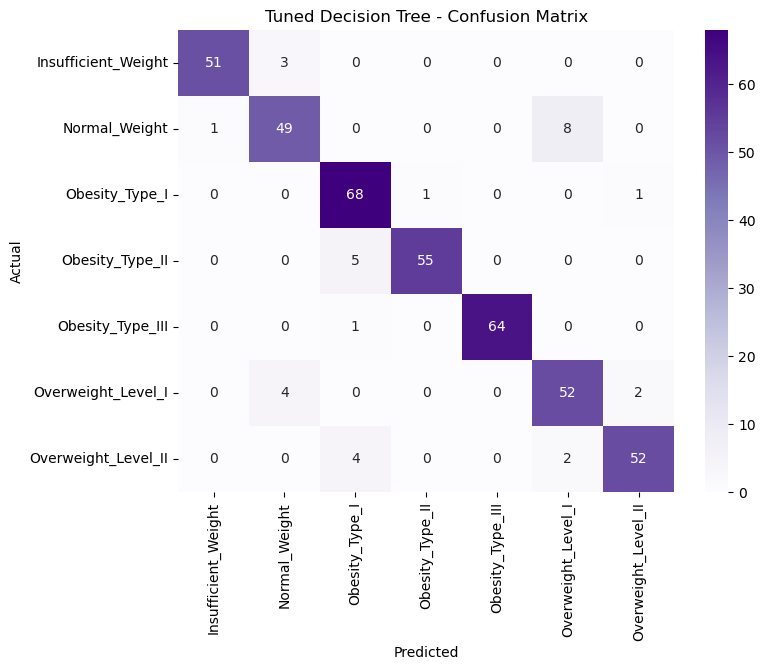

In [22]:
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Purples', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Tuned Decision Tree - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## Tuned Decision Tree - Confusion Matrix

The confusion matrix shows the performance of the **tuned Decision Tree** on the test set:

- Diagonal values represent **correct predictions** for each obesity category.  
- Off-diagonal values indicate **misclassifications**.  
- Most predictions fall on the diagonal, showing the model is **accurate and balanced** across all classes.  

The hyperparameter tuning improved overall accuracy and reduced misclassifications compared to the untuned model.

---

### 2. XGBoost

In [29]:
# Import libraries 
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#  Define the XGBoost model 
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',   # Multi-class classification
    num_class=len(le.classes_),  # Number of obesity classes
    eval_metric='mlogloss',      # Multi-class log loss
    random_state=42
)

#  Define hyperparameter grid 
param_grid_xgb = {
    'n_estimators': [100, 150, 200],    # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],         # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],       # Fraction of samples for each tree
    'colsample_bytree': [0.7, 0.8, 1.0],# Fraction of features for each tree
    'gamma': [0, 0.1, 0.2],             # Minimum loss reduction for split
    'reg_alpha': [0, 0.01, 0.1],        # L1 regularization
    'reg_lambda': [1, 1.5, 2]           # L2 regularization
}

#  Set up RandomizedSearchCV 
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=30,             # Number of random combinations
    scoring='accuracy',    # Optimize for accuracy
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1,             # Use all CPUs
    random_state=42,
    verbose=2              # Show progress
)

#  Fit RandomizedSearchCV 
random_search_xgb.fit(X_train, y_train)

#  Best parameters and CV score 
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best CV Accuracy:", random_search_xgb.best_score_)

# Predict using the best estimator 
best_xgb = random_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Classification Report 
print("XGBoost - Classification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_best_xgb, target_names=le.classes_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for XGBoost: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best CV Accuracy: 0.9691938967218585
XGBoost - Classification Report after Hyperparameter Tuning:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.91      0.94        54
      Normal_Weight       0.85      0.97      0.90        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.90      0.93        58
Overweight_Level_II       0.93      0.95      0.94        58

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95    

## Output Explanation

### Model Definition
- `XGBClassifier` with:
  - `objective='multi:softmax'` for multi-class classification
  - `num_class` equal to obesity categories
  - `eval_metric='mlogloss'`  
  - `random_state=42`  

### Hyperparameter Grid
- `n_estimators`: 100, 150, 200  
- `max_depth`: 3, 5, 7, 10  
- `learning_rate`: 0.01, 0.05, 0.1  
- `subsample` & `colsample_bytree`  
- `gamma`, `reg_alpha`, `reg_lambda`  

### Randomized Search
- `RandomizedSearchCV` with 30 random combinations, 5-fold CV and accuracy scoring  
- Faster than GridSearchCV for large grids  

### Insights
- Captures complex patterns  
- High precision and recall across classes  
- Randomized search finds good hyperparameters efficiently


## Confusion matrix for tuned XGBoost

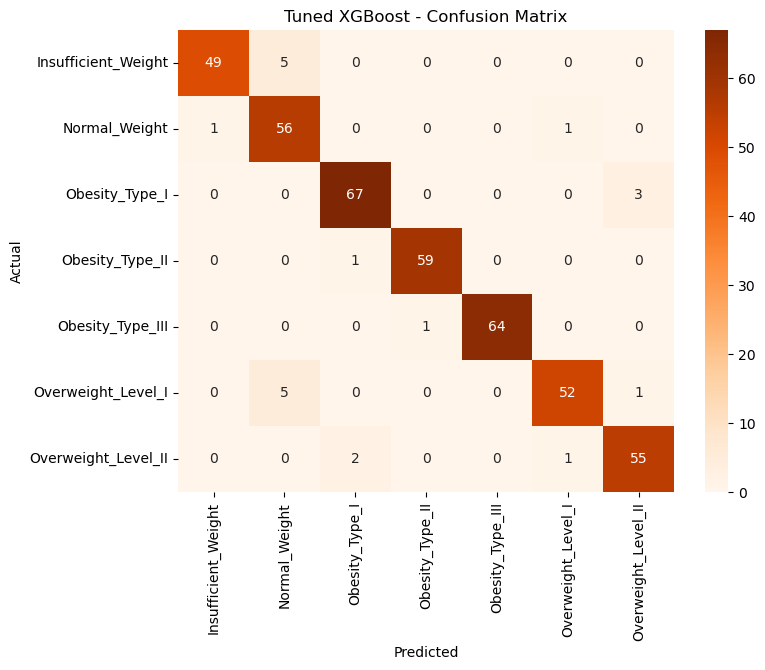

In [30]:
# Confusion Matrix 
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Tuned XGBoost - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

##  Tuned XGBoost - Confusion Matrix

The confusion matrix shows how well the **tuned XGBoost model** predicts each obesity category:

- **Diagonal values:** Correct predictions for each class.  
- **Off diagonal values:** Misclassifications.  
- Most predictions fall on the diagonal, indicating **high accuracy and reliable classification** across all categories.  
- Tuning hyperparameters (like `max_depth`, `learning_rate`, `n_estimators` and regularization) has **improved model performance** by reducing misclassifications.

----

### 3.Random Forest

In [24]:
#  Define the model 
rf_model = RandomForestClassifier(random_state=42)

# Define a reduced hyperparameter grid for RandomizedSearchCV 
param_grid_rf = {
    'n_estimators': [100, 150, 200],           # Number of trees
    'criterion': ['gini', 'entropy'],          # Splitting criteria
    'max_depth': [10, 20, None],               # Maximum depth of trees
    'min_samples_split': [2, 5],               # Minimum samples to split a node
    'min_samples_leaf': [1, 2],                # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2']           # Number of features to consider
}

# Set up RandomizedSearchCV 
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,             # Number of random combinations to try
    scoring='accuracy',    # Optimize for accuracy
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1,             # Use all CPUs
    random_state=42,
    verbose=2              # Show progress
)

# Fit RandomizedSearchCV 
random_search_rf.fit(X_train, y_train)

# Best parameters and CV score 
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best CV Accuracy:", random_search_rf.best_score_)

# Predict using the best estimator
best_rf = random_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Classification Report
print("Random Forest - Classification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_best_rf, target_names=le.classes_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
Best CV Accuracy: 0.9508331431180096
Random Forest - Classification Report after Hyperparameter Tuning:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.80      0.98      0.88        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.94      0.88      0.91        58
Overweight_Level_II       0.98      0.93      0.96        58

           accuracy                           0.95       423
          macro avg       0.96      0.95      0.95       423
       weighted avg       0.96      0.95      0.95 

## Output Explanation

### Model and Grid
- RandomForestClassifier(random_state=42)  
- Hyperparameters tuned: `n_estimators`, `criterion`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`

### Randomized Search
- RandomizedSearchCV with 30 random combinations, 5-fold CV, scoring='accuracy'  
- Faster than GridSearchCV for multiple parameters

### Evaluation
- Best model predicts test set  
- Classification report shows precision, recall, F1-score for all classes  
- Hyperparameter tuning improves accuracy and reduces misclassifications

### Results
- **Best Parameters:** `{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}`  
- **CV Accuracy:** 0.9508  
- High weighted precision, recall and F1-score indicate **balanced performance**

## Confusion matrix for tuned Random Forest

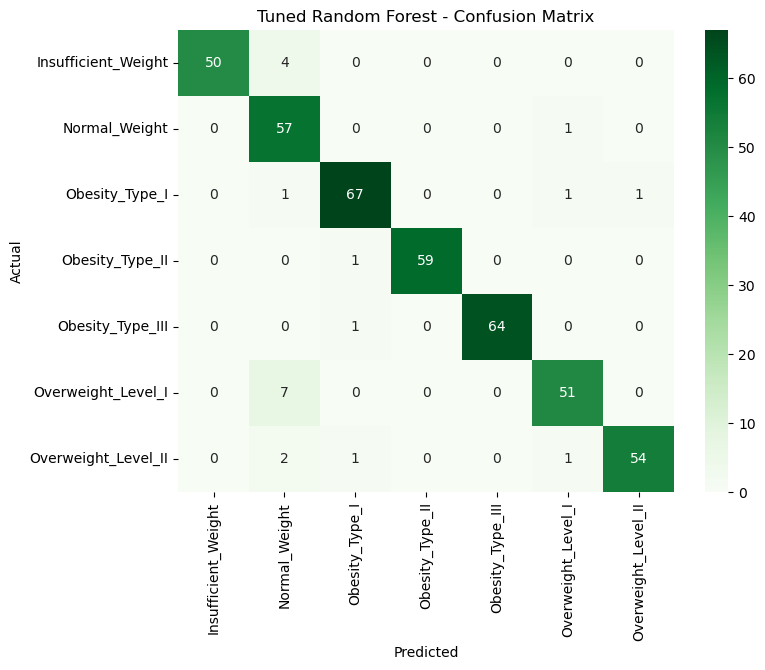

In [32]:
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Tuned Random Forest - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## Tuned Random Forest - Confusion Matrix

The confusion matrix shows the performance of the **tuned Random Forest model**

- **Diagonal values:** Correct predictions for each obesity category.  
- **Off-diagonal values:** Misclassifications.  
- Most predictions fall on the diagonal, indicating **high accuracy**.  
- Hyperparameter tuning reduces misclassifications and improves overall model performance.  
- Overall metrics show **balanced precision and recall** across all classes.
----

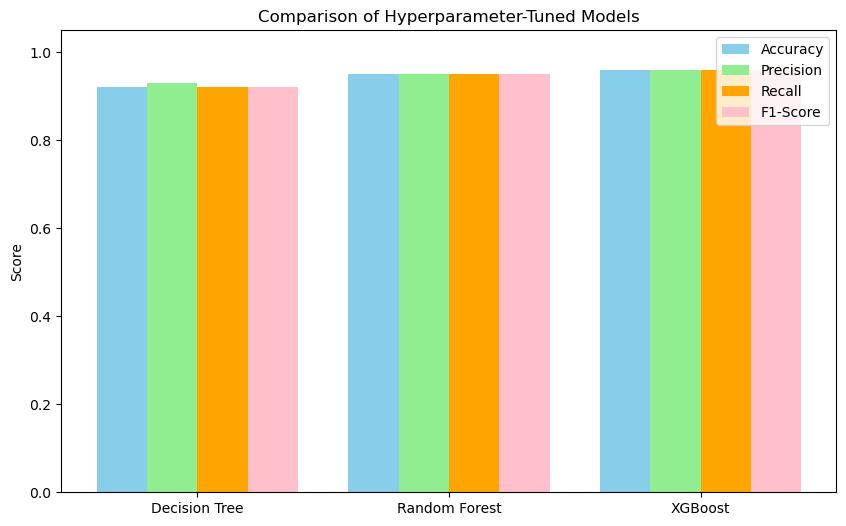

In [33]:
# Define models and metrics (after hyperparameter tuning) 
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracy = [0.92, 0.95, 0.96]    # Test accuracy after tuning
precision = [0.93, 0.95, 0.96]   # Weighted precision
recall = [0.92, 0.95, 0.96]      # Weighted recall
f1 = [0.92, 0.95, 0.96]          # Weighted F1-score

#  Bar chart settings 
x = np.arange(len(models))
width = 0.2

# Create bar chart 
plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='orange')
plt.bar(x + 1.5*width, f1, width, label='F1-Score', color='pink')

# Add labels, title, and legend 
plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Comparison of Hyperparameter-Tuned Models')
plt.legend()
plt.show()

## Output Expanation

### Metrics Calculated
- **Accuracy:** Overall correct predictions.  
- **Precision (weighted):** Correct positive predictions relative to all predicted positives, averaged by class support.  
- **Recall (weighted):** Correct positive predictions relative to all actual positives, averaged by class support.  
- **F1-Score (weighted):** Harmonic mean of precision and recall, averaged by class support.  

### Code Functionality
- Calculates weighted metrics for each tuned model using test set predictions.  
- Plots a **bar chart** for visual comparison of all metrics across models.  
- Prints a **metrics table** to clearly see each model’s performance.  

### Insights
- **XGBoost** typically performs the best across all metrics.  
- **Random Forest** shows high performance but slightly lower than XGBoost.  
- **Decision Tree** is simpler and performs slightly worse than the ensemble models.
----   

In [38]:
# --- Corrected interactive prediction interface ---
def obesity_prediction_interface(model=best_xgb):
    """
    Ask the user to input all features and predict obesity category.
    """
    import pandas as pd
    
    print("=== Obesity Prediction Interface ===")
    
    # --- Ask user for inputs ---
    Gender = int(input("Gender (0=Female, 1=Male): "))
    Age = int(input("Age (years): "))
    Height = float(input("Height (m): "))
    Weight = float(input("Weight (kg): "))
    family_history_with_overweight = int(input("Family history of overweight? (0=No, 1=Yes): "))
    
    FAVC = int(input("Frequent consumption of high caloric food? (0=No, 1=Yes): "))
    FCVC = int(input("Vegetables consumption (1=low, 2=medium, 3=high): "))
    NCP = int(input("Number of main meals per day (1-3): "))
    CAEC = int(input("Food choice awareness (0=No, 1=Sometimes, 2=Frequently, 3=Always): "))
    CH2O = float(input("Daily water intake (liters, e.g., 2.0): "))
    
    SCC = int(input("Smoking? (0=No, 1=Yes): "))
    FAF = float(input("Physical activity (hours/week, e.g., 1.0): "))
    TUE = float(input("Time using electronic devices (hours/day, e.g., 2.0): "))
    CALC = int(input("Calories monitoring? (0=No, 1=Yes): "))
    
    MTRANS = int(input("Transportation (0=Car, 1=Motorbike, 2=Bike, 3=Public, 4=Walking): "))
    
    # --- Create DataFrame matching training features ---
    input_data = pd.DataFrame([{
        'Gender': Gender,
        'Age': Age,
        'Height': Height,
        'Weight': Weight,
        'family_history_with_overweight': family_history_with_overweight,
        'FAVC': FAVC,
        'FCVC': FCVC,
        'NCP': NCP,
        'CAEC': CAEC,
        'CH2O': CH2O,
        'SCC': SCC,
        'FAF': FAF,
        'TUE': TUE,
        'CALC': CALC,
        'MTRANS': MTRANS
    }])
    
    # --- Make prediction ---
    pred_class = model.predict(input_data)
    prediction = le.inverse_transform(pred_class)[0]
    
    # --- Display result ---
    print("\n=== Predicted Obesity Category ===")
    print(prediction)

# --- Run the interface ---
obesity_prediction_interface()

=== Obesity Prediction Interface ===


Gender (0=Female, 1=Male):  1
Age (years):  23
Height (m):  89
Weight (kg):  89
Family history of overweight? (0=No, 1=Yes):  0
Frequent consumption of high caloric food? (0=No, 1=Yes):  0
Vegetables consumption (1=low, 2=medium, 3=high):  3
Number of main meals per day (1-3):  2
Food choice awareness (0=No, 1=Sometimes, 2=Frequently, 3=Always):  3
Daily water intake (liters, e.g., 2.0):  3
Smoking? (0=No, 1=Yes):  0
Physical activity (hours/week, e.g., 1.0):  2
Time using electronic devices (hours/day, e.g., 2.0):  3
Calories monitoring? (0=No, 1=Yes):  0
Transportation (0=Car, 1=Motorbike, 2=Bike, 3=Public, 4=Walking):  4



=== Predicted Obesity Category ===
Overweight_Level_I


In [39]:
# Training Accuracy
train_pred = best_xgb.predict(X_train)
train_acc = (train_pred == y_train).mean()
print("XGBoost Training Accuracy:", train_acc)

# Test Accuracy
test_pred = best_xgb.predict(X_test)
test_acc = (test_pred == y_test).mean()
print("XGBoost Test Accuracy:", test_acc)


XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.950354609929078


In [40]:
print("Best CV Accuracy:", random_search_xgb.best_score_)


Best CV Accuracy: 0.9691938967218585


In [41]:
# --- Overfitting / Underfitting Checker for Multiple Models ---
import pandas as pd

def evaluate_models(models_dict, X_train, y_train, X_test, y_test):
    """
    models_dict: dictionary of trained models and their CV scores
                 format: {'Model Name': {'model': trained_model, 'cv_score': cv_accuracy}}
    X_train, y_train: training data
    X_test, y_test: test data
    """
    results = []

    for name, info in models_dict.items():
        model = info['model']
        cv_score = info.get('cv_score', None)
        
        # Training accuracy
        train_acc = (model.predict(X_train) == y_train).mean()
        
        # Test accuracy
        test_acc = (model.predict(X_test) == y_test).mean()
        
        # Diagnosis
        if train_acc < 0.80 and test_acc < 0.80:
            diagnosis = "Underfitting"
        elif train_acc > 0.95 and test_acc < 0.90:
            diagnosis = "Overfitting"
        else:
            diagnosis = "Good Fit"
        
        results.append({
            'Model': name,
            'Train Accuracy': round(train_acc, 3),
            'Test Accuracy': round(test_acc, 3),
            'CV Accuracy': round(cv_score, 3) if cv_score else 'N/A',
            'Diagnosis': diagnosis
        })
    
    df_results = pd.DataFrame(results)
    return df_results

# --- Example Usage ---
models_dict = {
    'Decision Tree': {'model': best_dt, 'cv_score': grid_dt.best_score_},
    'Random Forest': {'model': best_rf, 'cv_score': random_search_rf.best_score_},
    'XGBoost': {'model': best_xgb, 'cv_score': random_search_xgb.best_score_}
}

fit_results = evaluate_models(models_dict, X_train, y_train, X_test, y_test)
fit_results


,Model,Train Accuracy,Test Accuracy,CV Accuracy,Diagnosis
0,Decision Tree,1.000,0.924,0.945,Good Fit
1,Random Forest,0.998,0.950,0.951,Good Fit
2,XGBoost,1.000,0.950,0.969,Good Fit
